In [1]:
import numpy as np
import math
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

sns.set(rc={"lines.linewidth": 2.5,"figure.figsize":(8,6)},font_scale=1.25)
sns.set_context("notebook")
sns.set_style("white")

/Users/cygnari/.local/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
point_1 = np.array([0, np.sqrt(3) / 2])
point_2 = np.array([-0.5, 0])
point_3 = np.array([0.5, 0])

In [3]:
n = 200
test_points = int((n + 1) * (n + 2) / 2)
test = np.zeros((test_points, 2))
delta_x = 1 / n

for i in range(n + 1):
    for j in range(i + 1):
        index = int(i * (i + 1) / 2 + j)
        a1 = 1 - i * delta_x
        a3 = j * delta_x
        a2 = 1 - a1 - a3
        test[index] = a1 * point_1 + a2 * point_2 + a3 * point_3

In [102]:
deg = 16
point_count = int((deg + 1) * (deg + 2) / 2)
points = np.zeros((point_count, 3))
fekete = np.zeros((point_count, 3))
delta_x = 1 / deg

In [103]:
point_count

153

In [104]:
for i in range(deg + 1):
    for j in range(i + 1):
        index = int(i * (i + 1) / 2 + j)
        points[index, 0] = 1 - i * delta_x
        points[index, 2] = j * delta_x
        points[index, 1] = 1 - points[index, 0] - points[index, 2]
        val1 = 0.5 * (1 + np.sin(math.pi / 2 * (2 * points[index, 0] - 1)))
        val2 = 0.5 * (1 + np.sin(math.pi / 2 * (2 * points[index, 1] - 1)))
        val3 = 0.5 * (1 + np.sin(math.pi / 2 * (2 * points[index, 2] - 1)))
        fekete[index, 0] = val1 / (val1 + val2 + val3)
        fekete[index, 1] = val2 / (val1 + val2 + val3)
        fekete[index, 2] = val3 / (val1 + val2 + val3)

In [105]:
coords = np.zeros((point_count, 2))
fek_co = np.zeros((point_count, 2))

In [106]:
for i in range(point_count):
    coords[i] = points[i, 0] * point_1 + points[i, 1] * point_2 + points[i, 2] * point_3
    fek_co[i] = fekete[i, 0] * point_1 + fekete[i, 1] * point_2 + fekete[i, 2] * point_3

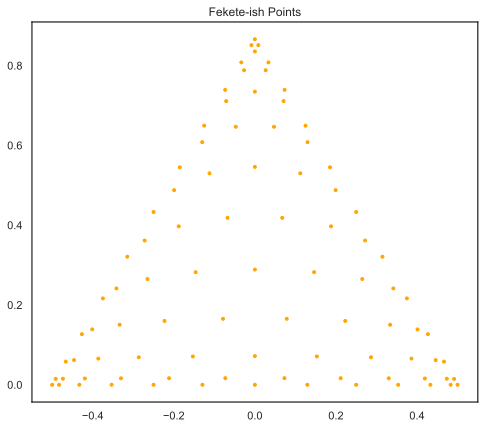

In [68]:
sns.set(rc={"figure.figsize":(8,7)},font_scale=1.25)
sns.set_context("notebook")
sns.set_style("white")
# plt.scatter(coords[:,0], coords[:,1], marker='.', label='Equispaced points')
plt.scatter(fek_co[:,0], fek_co[:,1], marker='.', label='Fekete-ish points', color='orange')
# plt.legend()
plt.title('Fekete-ish Points')
# plt.show()
plt.savefig('fekepoints.png', dpi=1200)

In [52]:
def test_func(x, y):
    return 1 / (100 * (np.square(x - 0.25) + np.square(y - 0.25)) + 1)

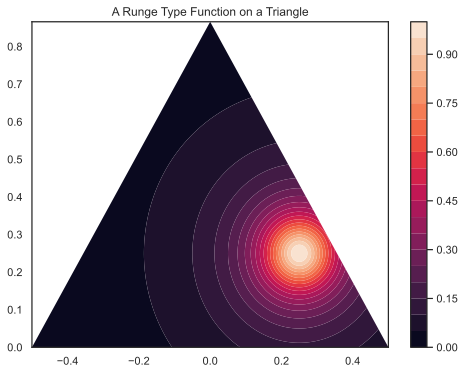

In [69]:
sns.set(rc={"lines.linewidth": 2.5,"figure.figsize":(8,6)},font_scale=1.25)
sns.set_context("notebook")
sns.set_style("white")
test_func_vals = test_func(test[:,0], test[:,1])
plt.tricontourf(test[:,0], test[:,1], test_func_vals, levels=np.mgrid[0:1:21j])
plt.colorbar()
plt.title('A Runge Type Function on a Triangle')
# plt.show()
plt.savefig('testinterpfunc.png', dpi=1200)

In [107]:
equi_mat = np.zeros((point_count, point_count))
feke_mat = np.zeros((point_count, point_count))

In [108]:
for i in range(deg + 1):
    for j in range(i + 1):
        index = int(i * (i + 1) / 2 + j)
        for k in range(point_count):
            x0 = coords[k, 0]
            y0 = coords[k, 1]
            x1 = fek_co[k, 0]
            y1 = fek_co[k, 1]
            equi_mat[k, index] = np.power(x0, i - j) * np.power(y0, j)
            feke_mat[k, index] = np.power(x1, i - j) * np.power(y1, j)

In [109]:
equi_vals = np.zeros(point_count)
feke_vals = np.zeros(point_count)

In [110]:
for i in range(point_count):
    equi_vals[i] = test_func(coords[i, 0], coords[i, 1])
    feke_vals[i] = test_func(fek_co[i, 0], fek_co[i, 1])

In [111]:
coeffs_equi = sp.linalg.solve(equi_mat, equi_vals)
coeffs_feke = sp.linalg.solve(feke_mat, feke_vals)

/var/folders/d8/tsgswjfj1471_9b92f94lsl40000gn/T/ipykernel_97596/3563890012.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=3.24556e-17): result may not be accurate.
  coeffs_equi = sp.linalg.solve(equi_mat, equi_vals)
/var/folders/d8/tsgswjfj1471_9b92f94lsl40000gn/T/ipykernel_97596/3563890012.py:2: LinAlgWarning: Ill-conditioned matrix (rcond=1.01859e-16): result may not be accurate.
  coeffs_feke = sp.linalg.solve(feke_mat, feke_vals)


In [112]:
def interp_eval(x, y, coeffs, count, deg):
    vals = np.zeros(count)
    for i in range(deg + 1):
        for j in range(i + 1):
            index = int(i * (i + 1) / 2 + j)
            vals = vals + np.power(x, i - j) * np.power(y, j) * coeffs[index]
    return vals

In [113]:
interp_equi = interp_eval(test[:,0], test[:,1], coeffs_equi, test_points, deg)
interp_feke = interp_eval(test[:,0], test[:,1], coeffs_feke, test_points, deg)

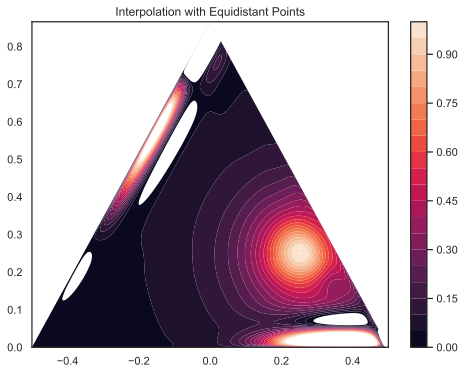

In [118]:
sns.set(rc={"lines.linewidth": 2.5,"figure.figsize":(8,6)},font_scale=1.25)
sns.set_context("notebook")
sns.set_style("white")
plt.tricontourf(test[:,0], test[:,1], interp_equi, levels=np.mgrid[0:1:21j])
plt.colorbar()
plt.title('Interpolation with Equidistant Points')
# plt.show()
plt.savefig('equiinterp.png', dpi=1200)

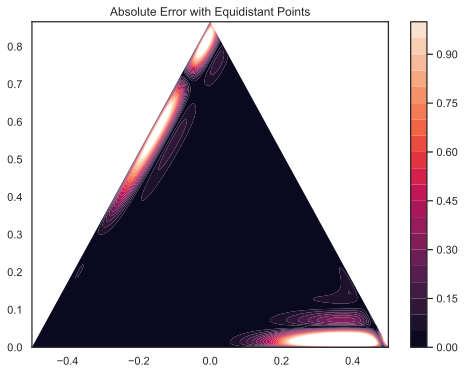

In [119]:
sns.set(rc={"lines.linewidth": 2.5,"figure.figsize":(8,6)},font_scale=1.25)
sns.set_context("notebook")
sns.set_style("white")
plt.tricontourf(test[:,0], test[:,1], np.abs((interp_equi - test_func_vals)), levels=np.mgrid[0:1:21j])
plt.colorbar()
plt.title('Absolute Error with Equidistant Points')
# plt.show()
plt.savefig('equierror.png',dpi=1200)

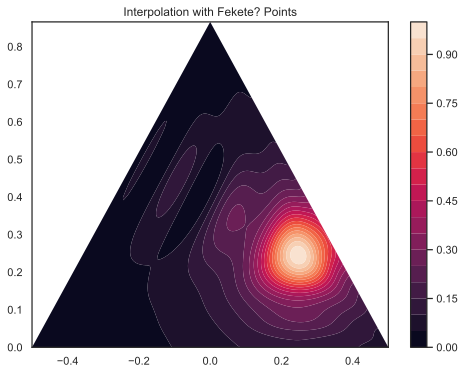

In [120]:
sns.set(rc={"lines.linewidth": 2.5,"figure.figsize":(8,6)},font_scale=1.25)
sns.set_context("notebook")
sns.set_style("white")
plt.tricontourf(test[:,0], test[:,1], interp_feke, levels=np.mgrid[0:1:21j])
plt.colorbar()
plt.title('Interpolation with Fekete? Points')
# plt.show()
plt.savefig('fekeinterp.png',dpi=1200)

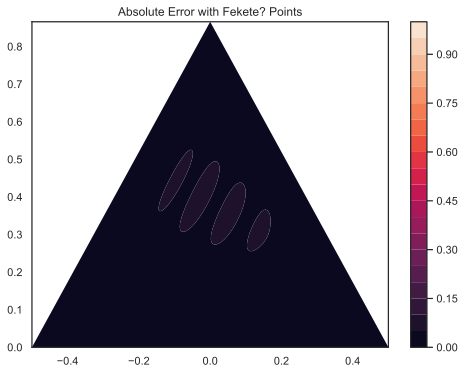

In [121]:
sns.set(rc={"lines.linewidth": 2.5,"figure.figsize":(8,6)},font_scale=1.25)
sns.set_context("notebook")
sns.set_style("white")
plt.tricontourf(test[:,0], test[:,1], np.abs((interp_feke - test_func_vals)), levels=np.mgrid[0:1:21j])
plt.colorbar()
plt.title('Absolute Error with Fekete? Points')
# plt.show()
plt.savefig('fekeerror.png',dpi=1200)

In [42]:
np.linalg.cond(equi_mat)

148823587302884.78

In [43]:
np.linalg.cond(feke_mat)

39897194984883.55

In [44]:
np.linalg.det(feke_mat)

0.0

In [45]:
np.linalg.det(equi_mat)

0.0